In [1]:
! pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


**Нечеткие множества**

Входные:
+ Время года
+ Количество осадков
+ Культура

Выходная:
+ Интенсивность полива (Метод дефазификации: mom (mean of maximum))


In [2]:
season = ctrl.Antecedent(np.arange(0, 12, 1), 'season')
precipitation_amount = ctrl.Antecedent(np.arange(0, 201, 1), 'precipitation_amount')
sowing = ctrl.Antecedent(np.arange(0, 3, 1), 'sowing')
irrigation_intensity = ctrl.Consequent(
    np.arange(0, 400, 1),
    'irrigation_intensity',
    defuzzify_method='mom'
)

**Разбиваем НМ на подмножества**
+ Лето, Осень, Зима, Весна
+ 0 - 100, 0 - 200, 100 - 200
+ Картофель, Пшеница, Рапс
+ 0 - 400 (л/м^2)

In [3]:
season['Spring'] = fuzz.trapmf(season.universe, [0, 0, 2, 2])
season['Summer'] = fuzz.trapmf(season.universe, [3, 3, 5, 5])
season['Autumn'] = fuzz.trapmf(season.universe, [6, 6, 8, 8])
season['Winter'] = fuzz.trapmf(season.universe, [9, 9, 11, 11])

precipitation_amount['Low'] = fuzz.trimf(precipitation_amount.universe, [0, 0, 100])
precipitation_amount['Mid'] = fuzz.trimf(precipitation_amount.universe, [0, 100, 200])
precipitation_amount['High'] = fuzz.trimf(precipitation_amount.universe, [100, 200, 200])

sowing['Wheat'] = fuzz.trimf(sowing.universe, [0, 0, 0])
sowing['Potato'] = fuzz.trimf(sowing.universe, [1, 1, 1])
sowing['Rapeseed'] = fuzz.trimf(sowing.universe, [2, 2, 2])

irrigation_intensity.automf(3)

**Визуализируем**

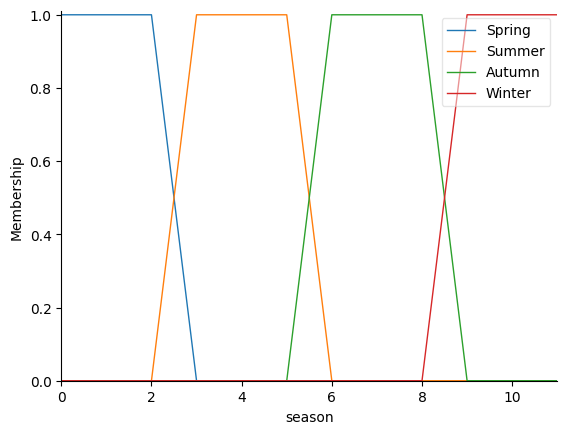

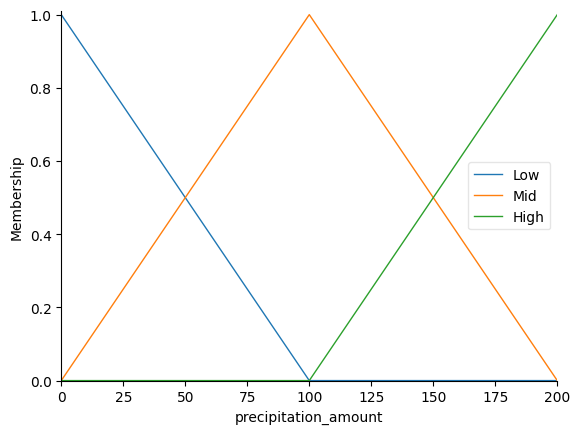

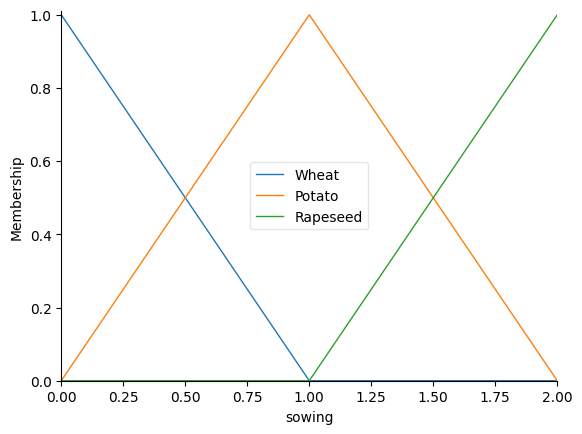

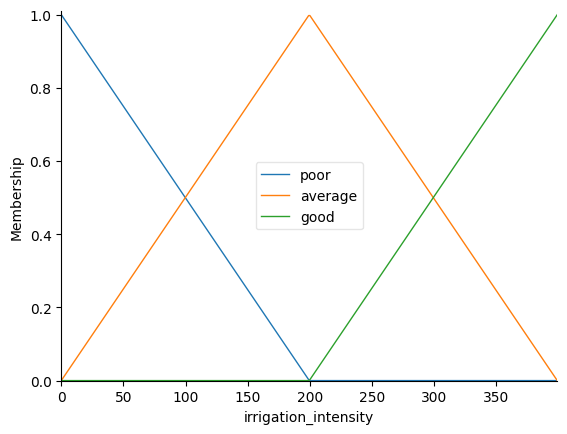

In [4]:
season.view()
precipitation_amount.view()
sowing.view()
irrigation_intensity.view()

**Правила**

Пшеница

| осадки\сезон | Весна | Лето  | Осень | Зима  |
|--------------|-------|-------|-------|-------|
| Низк         | средн | средн | средн | низк  |
| Средн        | средн | средн | низк  | низк  |
| Высок        | низк  | низк  | низк  | низк  |

Рапс

| осадки\сезон | Весна | Лето  | Осень | Зима  |
|--------------|-------|-------|-------|-------|
| Низк         | средн | средн | низк  | низк  |
| Средн        | низк  | низк  | низк  | низк  |
| Высок        | нихк  | низк  | низк  | низк  |

Картофель

| осадки\сезон | Весна | Лето  | Осень | Зима  |
|--------------|-------|-------|-------|-------|
| Низк         | высок | высок | низк  | низк  |
| Средн        | высок | высок | низк  | низк  |
| Высок        | высок | средн | низк  | низк  |

36 штук...

In [5]:
wheat_rule1 = ctrl.Rule(sowing['Wheat'] &
                  season['Spring'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['average'])
wheat_rule2 = ctrl.Rule(sowing['Wheat'] &
                  season['Spring'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['average'])
wheat_rule3 = ctrl.Rule(sowing['Wheat'] &
                  season['Spring'] &
                  precipitation_amount['High'],
                  irrigation_intensity['poor'])

wheat_rule4 = ctrl.Rule(sowing['Wheat'] &
                  season['Summer'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['average'])
wheat_rule5 = ctrl.Rule(sowing['Wheat'] &
                  season['Summer'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['average'])
wheat_rule6 = ctrl.Rule(sowing['Wheat'] &
                  season['Summer'] &
                  precipitation_amount['High'],
                  irrigation_intensity['poor'])

wheat_rule7 = ctrl.Rule(sowing['Wheat'] &
                  season['Autumn'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['average'])
wheat_rule8 = ctrl.Rule(sowing['Wheat'] &
                  season['Autumn'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['poor'])
wheat_rule9 = ctrl.Rule(sowing['Wheat'] &
                  season['Autumn'] &
                  precipitation_amount['High'],
                  irrigation_intensity['poor'])


potato_rule1 = ctrl.Rule(sowing['Potato'] &
                  season['Spring'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['good'])
potato_rule2 = ctrl.Rule(sowing['Potato'] &
                  season['Spring'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['good'])
potato_rule3 = ctrl.Rule(sowing['Potato'] &
                  season['Spring'] &
                  precipitation_amount['High'],
                  irrigation_intensity['good'])

potato_rule4 = ctrl.Rule(sowing['Potato'] &
                  season['Summer'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['good'])
potato_rule5 = ctrl.Rule(sowing['Potato'] &
                  season['Summer'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['good'])
potato_rule6 = ctrl.Rule(sowing['Potato'] &
                  season['Summer'] &
                  precipitation_amount['High'],
                  irrigation_intensity['average'])

potato_rule7 = ctrl.Rule(sowing['Potato'] &
                  season['Autumn'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['poor'])
potato_rule8 = ctrl.Rule(sowing['Potato'] &
                  season['Autumn'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['poor'])
potato_rule9 = ctrl.Rule(sowing['Potato'] &
                  season['Autumn'] &
                  precipitation_amount['High'],
                  irrigation_intensity['poor'])


rapeseed_rule1 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Spring'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['average'])
rapeseed_rule2 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Spring'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['poor'])
rapeseed_rule3 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Spring'] &
                  precipitation_amount['High'],
                  irrigation_intensity['poor'])

rapeseed_rule4 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Summer'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['average'])
rapeseed_rule5 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Summer'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['poor'])
rapeseed_rule6 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Summer'] &
                  precipitation_amount['High'],
                  irrigation_intensity['poor'])

rapeseed_rule7 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Autumn'] &
                  precipitation_amount['Low'],
                  irrigation_intensity['poor'])
rapeseed_rule8 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Autumn'] &
                  precipitation_amount['Mid'],
                  irrigation_intensity['poor'])
rapeseed_rule9 = ctrl.Rule(sowing['Rapeseed'] &
                  season['Autumn'] &
                  precipitation_amount['High'],
                  irrigation_intensity['poor'])

winter_rule = ctrl.Rule(season['Winter'], irrigation_intensity['poor'])

In [6]:
irrigation_ctrl = ctrl.ControlSystem([
    wheat_rule1, wheat_rule2, wheat_rule3,
    wheat_rule4, wheat_rule5, wheat_rule6,
    wheat_rule7, wheat_rule8, wheat_rule9,

    potato_rule1, potato_rule2, potato_rule3,
    potato_rule4, potato_rule5, potato_rule6,
    potato_rule7, potato_rule8, potato_rule9,

    rapeseed_rule1, rapeseed_rule2, rapeseed_rule3,
    rapeseed_rule4, rapeseed_rule5, rapeseed_rule6,
    rapeseed_rule7, rapeseed_rule8, rapeseed_rule9,

    winter_rule
])

irrigation = ctrl.ControlSystemSimulation(irrigation_ctrl)

In [7]:
irrigation.input['sowing'] = 1
irrigation.input['season'] = 0
irrigation.input['precipitation_amount'] = 50

irrigation 349.0024752475247


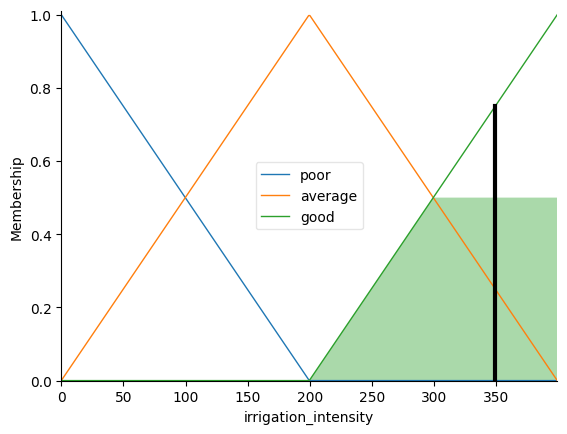

In [8]:
# запускаем расчет
irrigation.compute()

# Печатаем результат
print('irrigation', irrigation.output['irrigation_intensity'])

# выводим результат в виде графика
irrigation_intensity.view(sim=irrigation)

**Рандомные тестовые прогоны**

1.
sowing: Wheat
month: 10
precipitation_amount: 39
irrigation: 0.0

2.
sowing: Wheat
month: 5
precipitation_amount: 165
irrigation: 34.9975352112676

3.
sowing: Wheat
month: 10
precipitation_amount: 50
irrigation: 0.0

4.
sowing: Wheat
month: 6
precipitation_amount: 39
irrigation: 199.01066037735848

5.
sowing: Potato
month: 4
precipitation_amount: 43
irrigation: 356.00247126436784



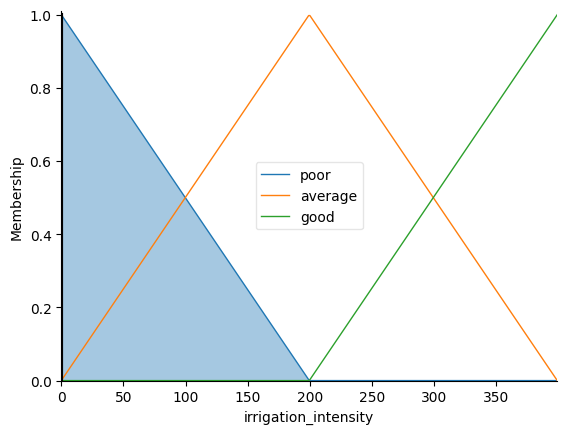

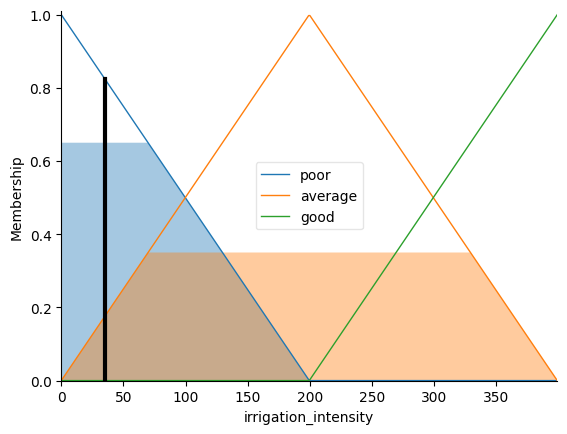

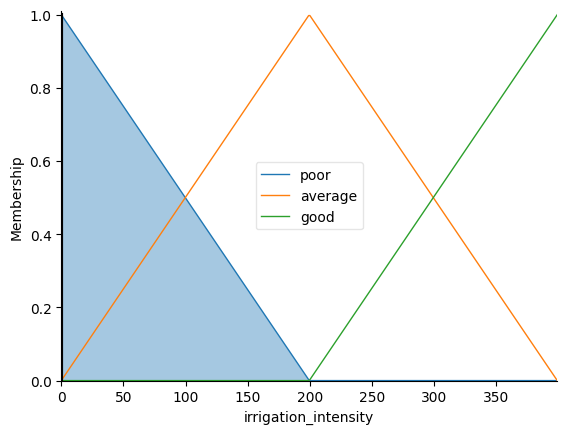

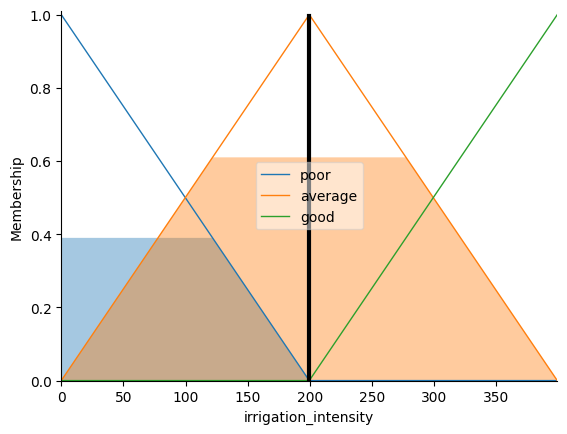

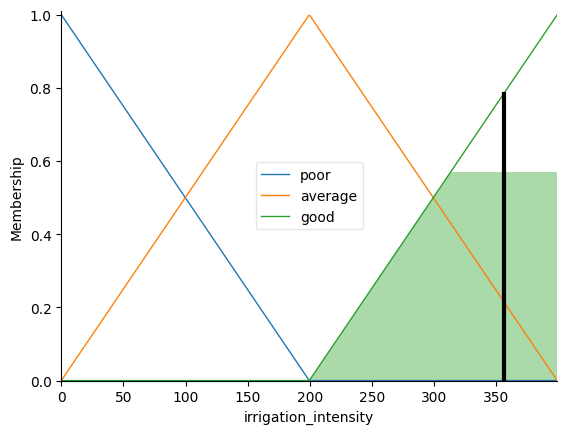

In [9]:
import random

for _ in range(5):
  sowing = random.randint(0, 2)
  season = random.randint(0, 11)
  precipitation_amount = random.randint(0, 200)

  irrigation.input['sowing'] = sowing
  irrigation.input['season'] = season
  irrigation.input['precipitation_amount'] = precipitation_amount

  irrigation.compute()
  print("{0}.\nsowing: {1}\nmonth: {2}\nprecipitation_amount: {3}\nirrigation: {4}\n"
  .format(
      _+1,
      'Wheat' if sowing == 0 else 'Potato' if sowing == 1 else 'Rapseed',
      season,
      precipitation_amount,
      irrigation.output['irrigation_intensity']
  ))
  # print('irrigation', irrigation.output['irrigation_intensity'])

  irrigation_intensity.view(sim=irrigation)
